<a href="https://colab.research.google.com/github/explicitgeek/Web-Mining/blob/master/Creating%20Data%20Frame%20of%20Term%20Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk 

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
print(stoplist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
import re
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from urllib import request
import pandas as pd

url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf-8')

raw = BeautifulSoup(html,'html.parser').get_text()
tokens = word_tokenize(raw)

l = []

for k in tokens:
  temp = re.sub(r"[^a-zA-Z0-9]+", ' ', k)
  if temp != ' ':
    l.append(temp)
print(l)

df = pd.DataFrame(columns = l)
print(df.head())

['BBC', 'NEWS', 'Health', 'Blondes', ' to', 'die', 'out', 'in', '200', 'years ', 'NEWS', 'SPORT', 'WEATHER', 'WORLD', 'SERVICE', 'A Z', 'INDEX', 'SEARCH', 'You', 'are', 'in', 'Health', 'News', 'Front', 'Page', 'Africa', 'Americas', 'Asia Pacific', 'Europe', 'Middle', 'East', 'South', 'Asia', 'UK', 'Business', 'Entertainment', 'Science Nature', 'Technology', 'Health', 'Medical', 'notes', 'Talking', 'Point', 'Country', 'Profiles', 'In', 'Depth', 'Programmes', 'SERVICES', 'Daily', 'E mail', 'News', 'Ticker', 'Mobile PDAs', 'Text', 'Only', 'Feedback', 'Help', 'EDITIONS', 'Change', 'to', 'UK', 'Friday', '27', 'September', '2002', '11 51', 'GMT', '12 51', 'UK', 'Blondes', ' to', 'die', 'out', 'in', '200', 'years ', 'Scientists', 'believe', 'the', 'last', 'blondes', 'will', 'be', 'in', 'Finland', 'The', 'last', 'natural', 'blondes', 'will', 'die', 'out', 'within', '200', 'years', 'scientists', 'believe', 'A', 'study', 'by', 'experts', 'in', 'Germany', 'suggests', 'people', 'with', 'blonde', '

In [22]:
import re
from nltk.tokenize import RegexpTokenizer

from bs4 import BeautifulSoup
from urllib import request
import requests
import pandas as pd

url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
# Make the request and check object type
r = requests.get(url)
# Extract HTML from Response object and print
html = r.text
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
# Get the text out of the soup and print it
text = soup.get_text()
# Create tokenizer
tokenizer = RegexpTokenizer('\w+')
# Create tokens
tokens = tokenizer.tokenize(text)
# Initialize new list
words = []
# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
# Initialize new list
words_ns = []
# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Finding the term frequency
l=[]
for word in words_ns:
  l.append(words_ns.count(word))


#data as lists.
data = {
    'Terms': words_ns,
    'Frequency': l
}

df = pd.DataFrame(data)
print(df)

       Terms  Frequency
0        bbc          7
1       news          8
2     health         11
3    blondes         16
4        die          5
..       ...        ...
532       rs         19
533        z          2
534       rs         19
535       07          1
536       rs         19

[537 rows x 2 columns]


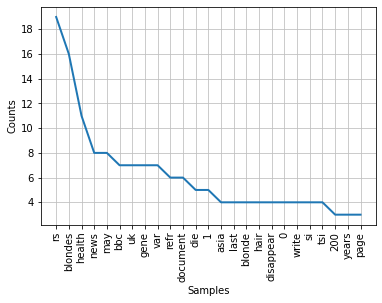

In [24]:
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

In [26]:
import re
from nltk.tokenize import RegexpTokenizer

from bs4 import BeautifulSoup
from urllib import request
import requests
import pandas as pd

url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
# Make the request and check object type
r = requests.get(url)
# Extract HTML from Response object and print
html = r.text
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
# Get the text out of the soup and print it
text = soup.get_text()
# Create tokenizer
tokenizer = RegexpTokenizer('\w+')
# Create tokens
tokens = tokenizer.tokenize(text)
# Initialize new list
words = []
# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
# Initialize new list
words_ns = []
# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Finding the term frequency
l=[]
for word in words_ns:
  l.append(words_ns.count(word))


#data as lists.
data = {
    'Terms': words_ns,
    'Frequency': l
}

df = pd.DataFrame(data)
df.to_csv('datafile.csv')